In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime
import re
import time

In [43]:
def scrape_page(url):
    response= requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        project_containers = soup.find_all('article', {'class': 'Box-row'}) # Encontrar os elementos de contêiner para os resultados
        
        data = []

        for container in project_containers: # Iterar sobre os resultados e extrair as informações
            # Procurar pelo título do projeto
            title_element = container.find('h2', {'class': 'h3'})
            title = title_element.text.strip() 
            # Remover espaços e quebras de linha extras no título
            title = ' '.join(title.split())

            # Procurar pela linguagem do projeto
            language_element = container.find('span', {'itemprop': 'programmingLanguage'})
            language = language_element.text.strip() if language_element else 'None'

            # Procurar pelo número de estrelas do projeto
            stars_element = container.find('a', {'class': 'Link Link--muted d-inline-block mr-3'})
            stars = stars_element.text.strip() if stars_element else 'None'
            stars= stars.replace('.','').replace(',','.')

            # Procurar pelo número de estrelas hoje
            stars_element_today = container.find('span',{'class':'d-inline-block float-sm-right'})
            stars_today=stars_element_today.text.strip() if stars_element_today else 'None'
            stars_today= stars_today.replace('.','').replace(',','.')          
            
            # Procurar forks do projeto esse tag estava extraindo o mesmo valor da stars
            forks_element=container.find_all('a',{'class':'Link Link--muted d-inline-block mr-3'}) # find_all pq estou procurando todas as class
            forks= forks_element[1].text.strip() if forks_element else 'None' # [1] estou selecionando o segundo elemento da class
            forks=forks.replace('.','').replace(',','.')

            # Adicionar os dados à lista
            data.append([title, language, stars, stars_today, forks])
        return data
    else:
        print(f"Falha na requisição para {url} com status code: {response.status_code}")
        return None
    
def write_to_csv(data):
    with open('github.csv', 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile, delimiter=',')
        csv_writer.writerow(['ranking', 'project', 'language', 'stars', 'stars_today', 'forks'])
        
        for index, row in enumerate(data, start=1):
            csv_writer.writerow([index] + row)
# scraping de todas as paginas do site
if __name__ == "__main__":
    base_url = 'https://github.com/trending'
    num_pages = 5  # Defina o número de páginas que você deseja percorrer

    for page in range(1, num_pages + 1):
        url = f'{base_url}?page={page}'
        page_data = scrape_page(url)

        if page_data:
            write_to_csv(page_data)
        time.sleep(1)
    print("Dados extraídos com sucesso e gravados em 'github.csv'.")

 


Dados extraídos com sucesso e gravados em 'github.csv'.


In [44]:
# Ler o arquivo CSV substituindo ponto e vírgula por vírgula
df = pd.read_csv('github.csv')

# Dividir a coluna "projeto" em duas colunas: "usuário" e "projeto"
df[['user', 'project']] = df['project'].str.split('/', n=1, expand=True)

# Extrair apenas os números da coluna "stars_today"
#df['stars_today'] = df['stars_today'].str.extract(r'(\d+)').astype(float)

# Reorganizar as colunas
df = df[['ranking', 'user', 'project', 'language', 'stars', 'stars_today', 'forks']]

# Redefinir o índice
df.reset_index(drop=True, inplace=True)

# Salvar o DataFrame de volta como um novo arquivo CSV
df.to_csv('github.csv', index=False, sep=',', decimal='.')
print("Arquivo editado salvo como 'github.csv'.")


Arquivo editado salvo como 'github.csv'.


In [45]:
df= pd.read_csv('github.csv')
display(df)

,ranking,user,project,language,stars,stars_today,forks
0,1,VAST-AI-Research,TripoSR,Python,1.518,222 stars today,174.000
1,2,HeyPuter,puter,JavaScript,4.912,740 stars today,199.000
2,3,hpcaitech,Open-Sora,Python,1.161,205 stars today,97.000
3,4,vosen,ZLUDA,Rust,6.725,197 stars today,365.000
4,5,Crimson-Hawk,suyu,C++,564.000,69 stars today,216.000
5,6,microsoft,generative-ai-for-beginners,Jupyter Notebook,27.800,237 stars today,16.802
6,7,Loyalsoldier,clash-rules,NaN,15.299,253 stars today,1.317
7,8,rasbt,LLMs-from-scratch,Jupyter Notebook,10.087,170 stars today,697.000
8,9,atherosai,ui,HTML,2.716,151 stars today,532.000
9,10,PKU-YuanGroup,Open-Sora-Plan,Python,4.992,234 stars today,438.000


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ranking      25 non-null     int64  
 1   user         25 non-null     object 
 2   project      25 non-null     object 
 3   language     22 non-null     object 
 4   stars        25 non-null     float64
 5   stars_today  25 non-null     float64
 6   forks        25 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


A Linguagem mais usada é: Python


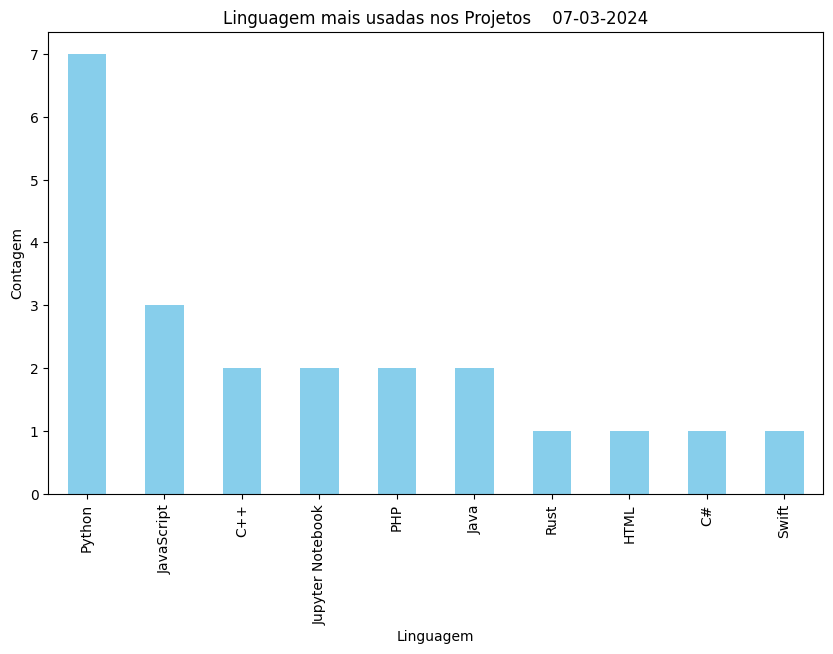

In [80]:
contagem_linguagem= df['language'].value_counts()
plt.figure(figsize=(10,6))
contagem_linguagem.plot(kind='bar', color='skyblue')
plt.title('Linguagem mais usadas nos Projetos    {}'.format(datetime.today().strftime('%d-%m-%Y')))
plt.xlabel('Linguagem')
plt.ylabel('Contagem')
plt.show

linguagem_mais_usada= contagem_linguagem.idxmax()
print(f'A Linguagem mais usada é: {linguagem_mais_usada}')

In [ ]:
contagem_linguagem= df['language'].value_counts()
plt.figure(figsize=(10,6))
contagem_linguagem.plot(kind='bar', color='skyblue')
plt.title('Linguagem mais usadas no Projetos    {}'.format(datetime.today().strftime('%d-%m-%Y')))
plt.xlabel('Linguagem')
plt.ylabel('Contagem')
plt.show

linguagem_mais_usada= contagem_linguagem.idxmax()
print(f'A Linguagem mais usada é: {linguagem_mais_usada}')

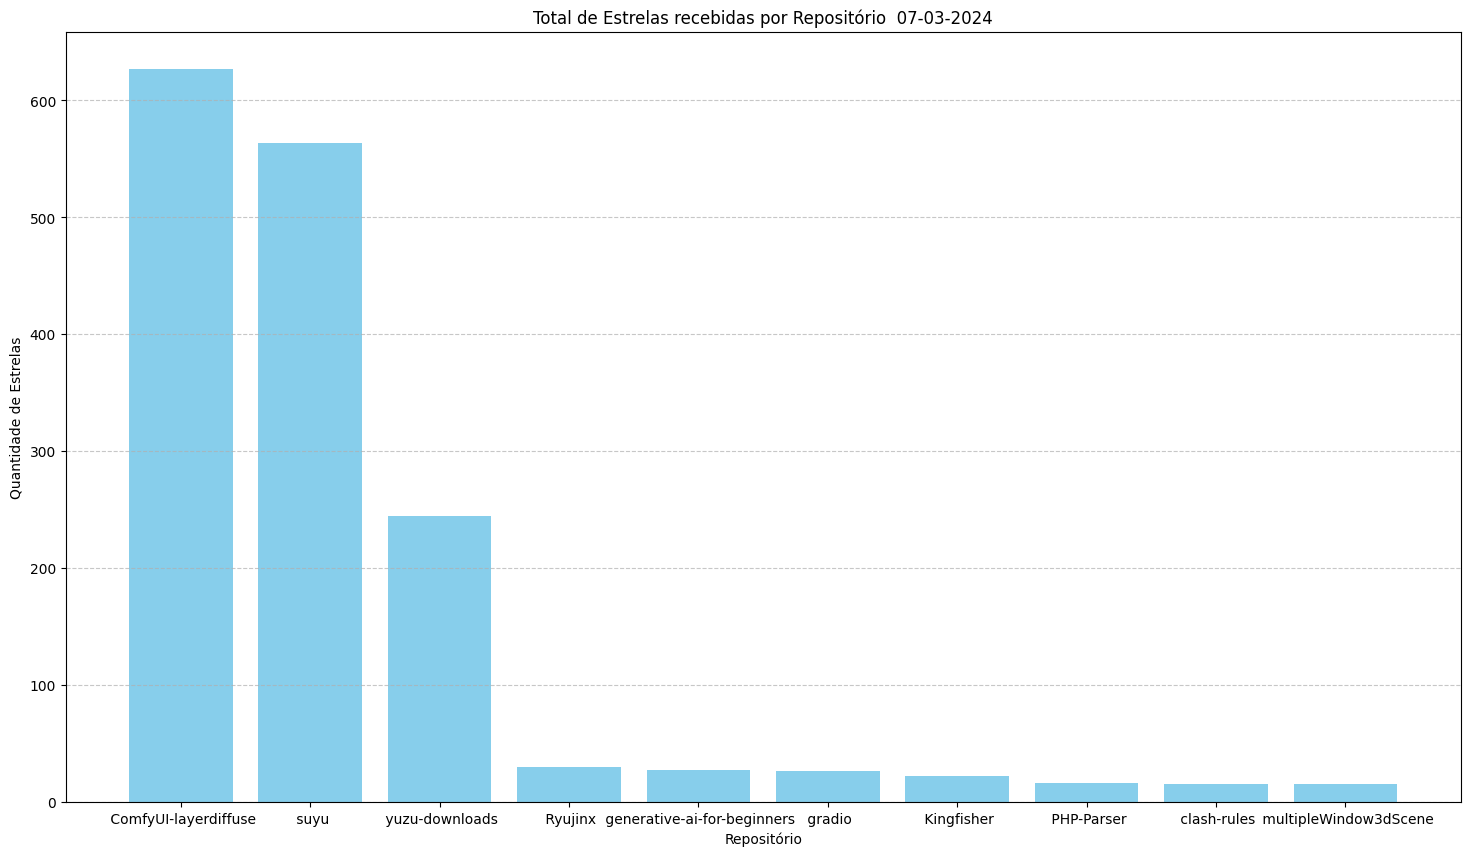

In [79]:
df_sorted_by_stars= df.sort_values(by='stars', ascending=False)
top_10= df_sorted_by_stars.head(10)
plt.figure(figsize=(18,10))
plt.bar(top_10['project'], top_10['stars'], color='skyblue')
plt.title('Total de Estrelas recebidas por Repositório  {}'.format(datetime.today().strftime('%d-%m-%Y')))
plt.xlabel('Repositório')
plt.ylabel('Quantidade de Estrelas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()